In [ ]:
!sudo apt-get install util-linux

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  dosfstools kbd util-linux-locales
The following packages will be upgraded:
  util-linux
1 upgraded, 0 newly installed, 0 to remove and 44 not upgraded.
Need to get 1,063 kB of archives.
After this operation, 4,096 B disk space will be freed.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 util-linux amd64 2.37.2-4ubuntu3.4 [1,063 kB]
Fetched 1,063 kB in 1s (1,683 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
(Reading database ... 121918 files and direc

In [ ]:
!apt-get install -y -qq software-properties-common
!add-apt-repository -y ppa:deadsnakes/ppa
!apt-get install -y -qq python3.10
!python 3.10

Repository: 'deb https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu/ jammy main'
Description:
This PPA contains more recent Python versions packaged for Ubuntu.

Disclaimer: there's no guarantee of timely updates in case of security problems or other issues. If you want to use them in a security-or-otherwise-critical environment (say, on a production server), you do so at your own risk.

Update Note
Please use this repository instead of ppa:fkrull/deadsnakes.

Reporting Issues

Issues can be reported in the master issue tracker at:
https://github.com/deadsnakes/issues/issues

Supported Ubuntu and Python Versions

- Ubuntu 20.04 (focal) Python3.5 - Python3.7, Python3.9 - Python3.13
- Ubuntu 22.04 (jammy) Python3.7 - Python3.9, Python3.11 - Python3.13
- Ubuntu 24.04 (noble) Python3.7 - Python3.11, Python3.13
- Note: Python2.7 (focal, jammy), Python 3.8 (focal), Python 3.10 (jammy), Python3.12 (noble) are not provided by deadsnakes as upstream ubuntu provides those packages.

Why some

In [ ]:
!pip install -U finance-datareader
# 패키지 설치 안되신 분은 위에 코드 주석해제하시고 패키지를 설치해주세요
# ref: https://github.com/huseinzol05/Stock-Prediction-Models
# and TGG amended some parameters and built data-pipeline which enables the code use FinanceDataReader data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 1.3 MB/s eta 0:00:00


# 새 섹션

In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import FinanceDataReader as fdr

In [ ]:
# def call_dataset(ticker = 'BTC/KRW', stt = '2015-01-01', end = '2024-05-07', history_points = 50):
#     data = fdr.DataReader(ticker, stt, end)
#     data = data.iloc[:,0:-1]
#     print('data: ', data.shape)
#     data = data.values # 값만 갖고온다
#     data_normalizer = preprocessing.MinMaxScaler() # 데이터를 0~1 범위로 점철되게 하는 함수 call
#     data_normalized = data_normalizer.fit_transform(data) # 데이터를 0~1 범위로 점철되게 함수 수행
#     print('data_normalized: ', data_normalized.shape)
#      # using the last {history_points} open close high low volume data points, predict the next open value
#     ohlcv_histories_normalized = np.array([data_normalized[i:i + history_points].copy() for i in range(len(data_normalized) - history_points)]) # ohlcv를 가지고 오되, 관찰일수 만큼 누적해서 쌓는다. (열방향으로)
#     print('ohlcv_histories_normalized: ', ohlcv_histories_normalized.shape)

#     next_day_open_values_normalized = np.array([data_normalized[:, 0][i + history_points].copy() for i in range(len(data_normalized) - history_points)])
#     next_day_open_values_normalized = np.expand_dims(next_day_open_values_normalized, -1) # 1XN 벡터 -> NX1 벡터로

#     next_day_open_values = np.array([data[:, 0][i + history_points].copy() for i in range(len(data) - history_points)])
#     next_day_open_values = np.expand_dims(next_day_open_values, -1) # 1XN 벡터 -> NX1 벡터로

#     y_normalizer = preprocessing.MinMaxScaler()
#     y_normalizer.fit(next_day_open_values)

#     def calc_rsi(values, time_period):
#         # https://www.investopedia.com/terms/r/rsi.asp
#         gains = []
#         losses = []
#         for i in range(1, len(values)):
#             change = values[i] - values[i-1]
#             if change >= 0:
#                 gains.append(change)
#                 losses.append(0)
#         else:
#             gains.append(0)
#             losses.append(abs(change))

#         avg_gain = np.mean(gains[-time_period:])
#         avg_loss = np.mean(losses[-time_period:])
#         if avg_loss == 0:
#             return 100
#         else:
#             rs = avg_gain / avg_loss
#             rsi = 100 - (100 / (1 + rs))
#             return rsi

#     technical_indicators = []
#     for his in ohlcv_histories_normalized:
#         rsi = calc_rsi(his[:, 3], 14)
#         technical_indicators.append(np.array([rsi]))

#     technical_indicators = np.array(technical_indicators)

#     tech_ind_scaler = preprocessing.MinMaxScaler()
#     technical_indicators_normalized = tech_ind_scaler.fit_transform(technical_indicators)

#     technical_indicators = np.array(technical_indicators)

#     tech_ind_scaler = preprocessing.MinMaxScaler()
#     technical_indicators_normalized = tech_ind_scaler.fit_transform(technical_indicators)

#     assert ohlcv_histories_normalized.shape[0] == next_day_open_values_normalized.shape[0] == technical_indicators_normalized.shape[0]

#     print('ohlcv_histories_normalized.shape[0]: ', ohlcv_histories_normalized.shape[0])

#     return ohlcv_histories_normalized, technical_indicators_normalized, next_day_open_values_normalized, next_day_open_values, y_normalizer

# ************************************next two day 추가버전************************************************************************************************************
def call_dataset(ticker = 'BTC/KRW', stt = '2015-01-01', end = '2024-05-07', history_points = 50):
    data = fdr.DataReader(ticker, stt, end)
    data = data.iloc[:,0:-1]
    print('data: ', data.shape)
    data = data.values # 값만 갖고온다
    data_normalizer = preprocessing.MinMaxScaler() # 데이터를 0~1 범위로 점철되게 하는 함수 call
    data_normalized = data_normalizer.fit_transform(data) # 데이터를 0~1 범위로 점철되게 함수 수행
    print('data_normalized: ', data_normalized.shape)
     # using the last {history_points} open close high low volume data points, predict the next open value
    ohlcv_histories_normalized = np.array([data_normalized[i:i + history_points].copy() for i in range(len(data_normalized) - history_points)]) # ohlcv를 가지고 오되, 관찰일수 만큼 누적해서 쌓는다. (열방향으로)
    print('ohlcv_histories_normalized: ', ohlcv_histories_normalized.shape)

    next_two_day_open_values = np.array([data[:, 0][i + history_points + 1].copy() for i in range(len(data) - history_points - 1)])
    next_two_day_open_values = np.expand_dims(next_two_day_open_values, -1)

    next_two_day_open_values_normalized = np.array([data_normalized[:, 0][i + history_points + 1].copy() for i in range(len(data_normalized) - history_points - 1)])
    next_two_day_open_values_normalized = np.expand_dims(next_two_day_open_values_normalized, -1)

    y_2_normalizer = preprocessing.MinMaxScaler()
    y_2_normalizer.fit(next_two_day_open_values)

    def calc_rsi(values, time_period):
        # https://www.investopedia.com/terms/r/rsi.asp
        gains = []
        losses = []
        for i in range(1, len(values)):
            change = values[i] - values[i-1]
            if change >= 0:
                gains.append(change)
                losses.append(0)
        else:
            gains.append(0)
            losses.append(abs(change))

        avg_gain = np.mean(gains[-time_period:])
        avg_loss = np.mean(losses[-time_period:])
        if avg_loss == 0:
            return 100
        else:
            rs = avg_gain / avg_loss
            rsi = 100 - (100 / (1 + rs))
            return rsi

    technical_indicators = []
    for his in ohlcv_histories_normalized:
        # his = ohlcv_histories_normalized[i]
        rsi = calc_rsi(his[:, 3], 14)
        technical_indicators.append(np.array([rsi]))

    technical_indicators = np.array(technical_indicators)

    tech_ind_scaler = preprocessing.MinMaxScaler()
    technical_indicators_normalized = tech_ind_scaler.fit_transform(technical_indicators)

    #assert ohlcv_histories_normalized.shape == technical_indicators_normalized.shape
    #assert ohlcv_histories_normalized.shape[0] == next_two_day_open_values_normalized.shape[0] + 1

    print('ohlcv_histories_normalized.shape[0]: ', ohlcv_histories_normalized.shape[0])

    return ohlcv_histories_normalized, technical_indicators_normalized, next_two_day_open_values_normalized, next_two_day_open_values, y_2_normalizer
# ************************************next two day 추가버전************************************************************************************************************

In [ ]:
print(ohlcv_histories.shape)
print(next_two_day_open_values.shape)
next_two_day_open_values.append()

(3365, 50, 5)
(3364, 1)


In [ ]:
# history_points = 50
# ticker = 'BTC/KRW' # BTC/KRW

# import keras
# from keras.models import Model
# from keras.layers import Dense, Dropout, LSTM, Input, Activation
# from keras import optimizers
# import numpy as np
# np.random.seed(4)
# # from tensorflow import set_random_seed
# import tensorflow
# print(tensorflow.__version__)
# tensorflow.random.set_seed(44)
# # from util import csv_to_dataset, history_points

# # dataset
# ohlcv_histories, _, next_day_open_values, unscaled_y, y_normaliser = call_dataset(ticker=ticker)

# train_ratio = 0.7
# n = int(ohlcv_histories.shape[0] * train_ratio)

# ohlcv_train = ohlcv_histories[-n:-1]
# y_train = next_day_open_values[-n:-1]

# ohlcv_test = ohlcv_histories[:ohlcv_histories.shape[0]-n]
# y_test = next_day_open_values[:ohlcv_histories.shape[0]-n]

# unscaled_y_test = unscaled_y[:ohlcv_histories.shape[0]-n]

# print('ohlcv_train.shape: ', ohlcv_train.shape)
# print('ohlcv_test.shape: ',ohlcv_test.shape)

# ************************************TECH IND 추가버전******************************************************
# history_points = 50
# ticker = 'BTC/KRW' # BTC/KRW

# import keras
# from keras.models import Model
# from keras.layers import Dense, Dropout, LSTM, Input, Activation
# from keras import optimizers
# import numpy as np
# np.random.seed(4)
# import tensorflow
# print(tensorflow.__version__)
# tensorflow.random.set_seed(44)

# # dataset
# ohlcv_histories, technical_indicators_normalized, next_day_open_values, unscaled_y, y_normaliser = call_dataset(ticker=ticker)

# train_ratio = 0.7
# n = int(ohlcv_histories.shape[0] * train_ratio)

# ohlcv_train = ohlcv_histories[-n:-1]
# tech_ind_train = technical_indicators_normalized[-n:-1]
# y_train = next_day_open_values[-n:-1]

# ohlcv_test = ohlcv_histories[:ohlcv_histories.shape[0]-n]
# tech_ind_test = technical_indicators_normalized[:ohlcv_histories.shape[0]-n]
# y_test = next_day_open_values[:ohlcv_histories.shape[0]-n]

# unscaled_y_test = unscaled_y[:ohlcv_histories.shape[0]-n]

# print('ohlcv_train.shape: ', ohlcv_train.shape)
# print('tech_ind_train.shape: ', tech_ind_train.shape)
# print('ohlcv_test.shape: ', ohlcv_test.shape)
# print('tech_ind_test.shape: ', tech_ind_test.shape)
# ************************************TECH IND 추가버전******************************************************

# ************************************next two day 추가버전************************************************************************************************************
history_points = 50
ticker = 'BTC/KRW' # BTC/KRW

import keras
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation
from keras import optimizers
import numpy as np
np.random.seed(4)
# from tensorflow import set_random_seed
import tensorflow
print(tensorflow.__version__)
tensorflow.random.set_seed(44)
# from util import csv_to_dataset, history_points

# dataset
ohlcv_histories, _, next_two_day_open_values, unscaled_y, y_2_normaliser = call_dataset(ticker=ticker)

train_ratio = 0.7
n = int(ohlcv_histories.shape[0] * train_ratio)

ohlcv_train = ohlcv_histories[-n:-1]
y_train = next_two_day_open_values[-n:-1]

ohlcv_test = ohlcv_histories[:ohlcv_histories.shape[0]-n]
y_test = next_two_day_open_values[:ohlcv_histories.shape[0]-n]

unscaled_y_test = unscaled_y[:ohlcv_histories.shape[0]-n]

print('ohlcv_train.shape: ', ohlcv_train.shape)
print('ohlcv_test.shape: ', ohlcv_test.shape)
# ************************************next two day 추가버전************************************************************************************************************

# ************************************next two day,TECH IND 추가버전************************************************************************************************************
# history_points = 50
# ticker = 'BTC/KRW' # BTC/KRW

# import keras
# from keras.models import Model
# from keras.layers import Dense, Dropout, LSTM, Input, Activation
# from keras import optimizers
# import numpy as np
# np.random.seed(4)
# import tensorflow
# print(tensorflow.__version__)
# tensorflow.random.set_seed(44)

# # dataset
# ohlcv_histories, technical_indicators_normalized, next_two_day_open_values, unscaled_y, y_2_normalizer = call_dataset(ticker=ticker)

# train_ratio = 0.7
# n = int(ohlcv_histories.shape[0] * train_ratio)

# ohlcv_train = ohlcv_histories[-n:-1]
# tech_ind_train = technical_indicators_normalized[-n:-1]
# y_train = next_two_day_open_values[-n:-1]

# ohlcv_test = ohlcv_histories[:ohlcv_histories.shape[0]-n]
# tech_ind_test = technical_indicators_normalized[:ohlcv_histories.shape[0]-n]
# y_test = next_two_day_open_values[:ohlcv_histories.shape[0]-n]

# unscaled_y_test = unscaled_y[:ohlcv_histories.shape[0]-n]

# print('ohlcv_train.shape: ', ohlcv_train.shape)
# print('tech_ind_train.shape: ', tech_ind_train.shape)
# print('ohlcv_test.shape: ', ohlcv_test.shape)
# print('tech_ind_test.shape: ', tech_ind_test.shape)
# ************************************next two day,TECH IND 추가버전************************************************************************************************************


2.15.0
data:  (3415, 5)
data_normalized:  (3415, 5)
ohlcv_histories_normalized:  (3365, 50, 5)
ohlcv_histories_normalized.shape[0]:  3365
ohlcv_train.shape:  (2354, 50, 5)
ohlcv_test.shape:  (1010, 50, 5)


In [ ]:
ohlcv_train

array([[[0.04964738, 0.04934842, 0.05005888, 0.05031523, 0.05031523],
        [0.05036006, 0.05146257, 0.05107706, 0.052453  , 0.052453  ],
        [0.05251263, 0.05432276, 0.05289784, 0.05431916, 0.05431916],
        ...,
        [0.09027768, 0.08884899, 0.08958523, 0.08786474, 0.08786474],
        [0.08826963, 0.09000926, 0.08854631, 0.09044262, 0.09044262],
        [0.09031926, 0.09455776, 0.09149786, 0.09645904, 0.09645904]],

       [[0.05036006, 0.05146257, 0.05107706, 0.052453  , 0.052453  ],
        [0.05251263, 0.05432276, 0.05289784, 0.05431916, 0.05431916],
        [0.05438048, 0.05436023, 0.05488145, 0.0539954 , 0.0539954 ],
        ...,
        [0.08826963, 0.09000926, 0.08854631, 0.09044262, 0.09044262],
        [0.09031926, 0.09455776, 0.09149786, 0.09645904, 0.09645904],
        [0.09644862, 0.10262265, 0.09816551, 0.10253703, 0.10253703]],

       [[0.05251263, 0.05432276, 0.05289784, 0.05431916, 0.05431916],
        [0.05438048, 0.05436023, 0.05488145, 0.0539954 , 0.0

In [ ]:
# model architecture
# lstm_input = Input(shape=(history_points, 5), name='lstm_input')
# x = LSTM(50, name='lstm_0')(lstm_input)
# x = Dropout(0.2, name='lstm_dropout_0')(x)
# x = Dense(64, name='dense_0')(x)
# x = Activation('sigmoid', name='sigmoid_0')(x)
# x = Dense(1, name='dense_1')(x)
# output = Activation('linear', name='linear_output')(x)

# model = Model(inputs=lstm_input, outputs=output)
# adam = optimizers.Adam(lr=0.0005)
# model.compile(optimizer=adam, loss='mse')
# model.fit(x=ohlcv_train, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.1)

# # evaluation
# y_test_predicted = model.predict(ohlcv_test)
# y_test_predicted = y_normaliser.inverse_transform(y_test_predicted)
# y_predicted = model.predict(ohlcv_histories)
# y_predicted = y_normaliser.inverse_transform(y_predicted)

# assert unscaled_y_test.shape == y_test_predicted.shape
# real_mse = np.mean(np.square(unscaled_y_test - y_test_predicted))
# scaled_mse = real_mse / (np.max(unscaled_y_test) - np.min(unscaled_y_test)) * 100
# print('scaled_mse: ',scaled_mse)

# from datetime import datetime
# model.save(f'basic_model.h5')

# ************************************TECH IND 추가버전******************************************************
# lstm_input_1 = Input(shape=(history_points, 5), name='lstm_input_1')
# lstm_input_2 = Input(shape=(1,), name='lstm_input_2')

# x = LSTM(50, name='lstm_0')(lstm_input_1)
# x = Dropout(0.2, name='lstm_dropout_0')(x)
# x = Dense(64, name='dense_0')(x)
# x = Activation('sigmoid', name='sigmoid_0')(x)
# x = Dense(64, name='dense_1')(x)
# x = Activation('sigmoid', name='sigmoid_1')(x)
# x = keras.layers.concatenate([x, lstm_input_2], axis=1)
# x = Dense(1, name='dense_2')(x)
# output = Activation('linear', name='linear_output')(x)

# model = Model(inputs=[lstm_input_1, lstm_input_2], outputs=output)
# adam = optimizers.Adam(lr=0.0005)
# model.compile(optimizer=adam, loss='mse')
# model.fit(x=[ohlcv_train, tech_ind_train], y=y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.1)
# # evaluation
# y_test_predicted = model.predict([ohlcv_test, tech_ind_test])
# y_test_predicted = y_normaliser.inverse_transform(y_test_predicted)
# y_predicted = model.predict([ohlcv_histories, technical_indicators_normalized])
# y_predicted = y_normaliser.inverse_transform(y_predicted)

# assert unscaled_y_test.shape == y_test_predicted.shape
# real_mse = np.mean(np.square(unscaled_y_test - y_test_predicted))
# scaled_mse = real_mse / (np.max(unscaled_y_test) - np.min(unscaled_y_test)) * 100
# print('scaled_mse: ',scaled_mse)

# from datetime import datetime
# model.save(f'basic_model.h5')
# ************************************TECH IND 추가버전******************************************************
# ************************************next two day 추가버전************************************************************************************************************
# model architecture
lstm_input = Input(shape=(history_points, 5), name='lstm_input')
x = LSTM(50, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
x = Dense(64, name='dense_0')(x)
x = Activation('sigmoid', name='sigmoid_0')(x)
x = Dense(1, name='dense_1')(x)
output = Activation('linear', name='linear_output')(x)

model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam(lr=0.0005)
model.compile(optimizer=adam, loss='mse')
model.fit(x=ohlcv_train, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.1)

# evaluation
y_test_predicted = model.predict(ohlcv_test)
y_test_predicted = y_2_normalizer.inverse_transform(y_test_predicted)
y_predicted = model.predict(ohlcv_histories)
y_predicted = y_2_normalizer.inverse_transform(y_predicted)

assert unscaled_y_test.shape == y_test_predicted.shape
real_mse = np.mean(np.square(unscaled_y_test - y_test_predicted))
scaled_mse = real_mse / (np.max(unscaled_y_test) - np.min(unscaled_y_test)) * 100
print('scaled_mse: ',scaled_mse)

from datetime import datetime
model.save(f'basic_model.h5')
# ************************************next two day 추가버전************************************************************************************************************
# ************************************next two day,TECH IND 추가버전************************************************************************************************************
# lstm_input_1 = Input(shape=(history_points, 5), name='lstm_input_1')
# lstm_input_2 = Input(shape=(1,), name='lstm_input_2')

# x = LSTM(50, name='lstm_0')(lstm_input_1)
# x = Dropout(0.2, name='lstm_dropout_0')(x)
# x = Dense(64, name='dense_0')(x)
# x = Activation('sigmoid', name='sigmoid_0')(x)
# x = Dense(64, name='dense_1')(x)
# x = Activation('sigmoid', name='sigmoid_1')(x)
# x = keras.layers.concatenate([x, lstm_input_2], axis=1)
# x = Dense(1, name='dense_2')(x)
# output = Activation('linear', name='linear_output')(x)

# model = Model(inputs=[lstm_input_1, lstm_input_2], outputs=output)
# adam = optimizers.Adam(lr=0.0005)
# model.compile(optimizer=adam, loss='mse')
# model.fit(x=[ohlcv_train, tech_ind_train], y=y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.1)

# # evaluation
# y_test_predicted = model.predict([ohlcv_test, tech_ind_test])
# y_test_predicted = y_2_normalizer.inverse_transform(y_test_predicted)
# y_predicted = model.predict([ohlcv_histories, technical_indicators_normalized])
# y_predicted = y_2_normalizer.inverse_transform(y_predicted)

# assert unscaled_y_test.shape == y_test_predicted.shape
# real_mse = np.mean(np.square(unscaled_y_test - y_test_predicted))
# scaled_mse = real_mse / (np.max(unscaled_y_test) - np.min(unscaled_y_test)) * 100
# print('scaled_mse: ',scaled_mse)

# from datetime import datetime
# model.save(f'basic_model.h5')
# ************************************next two day,TECH IND 추가버전************************************************************************************************************



Epoch 1/50
67/67 [==============================] - 3s 13ms/step - loss: 0.0364 - val_loss: 0.0114
Epoch 2/50
67/67 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 3/50
67/67 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 4/50
67/67 [==============================] - 0s 6ms/step - loss: 9.6756e-04 - val_loss: 0.0014
Epoch 5/50
67/67 [==============================] - 0s 6ms/step - loss: 8.2994e-04 - val_loss: 7.7124e-04
Epoch 6/50
67/67 [==============================] - 0s 6ms/step - loss: 8.4455e-04 - val_loss: 7.9090e-04
Epoch 7/50
67/67 [==============================] - 0s 6ms/step - loss: 7.6770e-04 - val_loss: 0.0014
Epoch 8/50
67/67 [==============================] - 0s 6ms/step - loss: 7.3170e-04 - val_loss: 9.3571e-04
Epoch 9/50
67/67 [==============================] - 0s 6ms/step - loss: 7.0425e-04 - val_loss: 0.0012
Epoch 10/50
67/67 [==============================] - 0s 6ms/step - loss: 5.8667e-

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


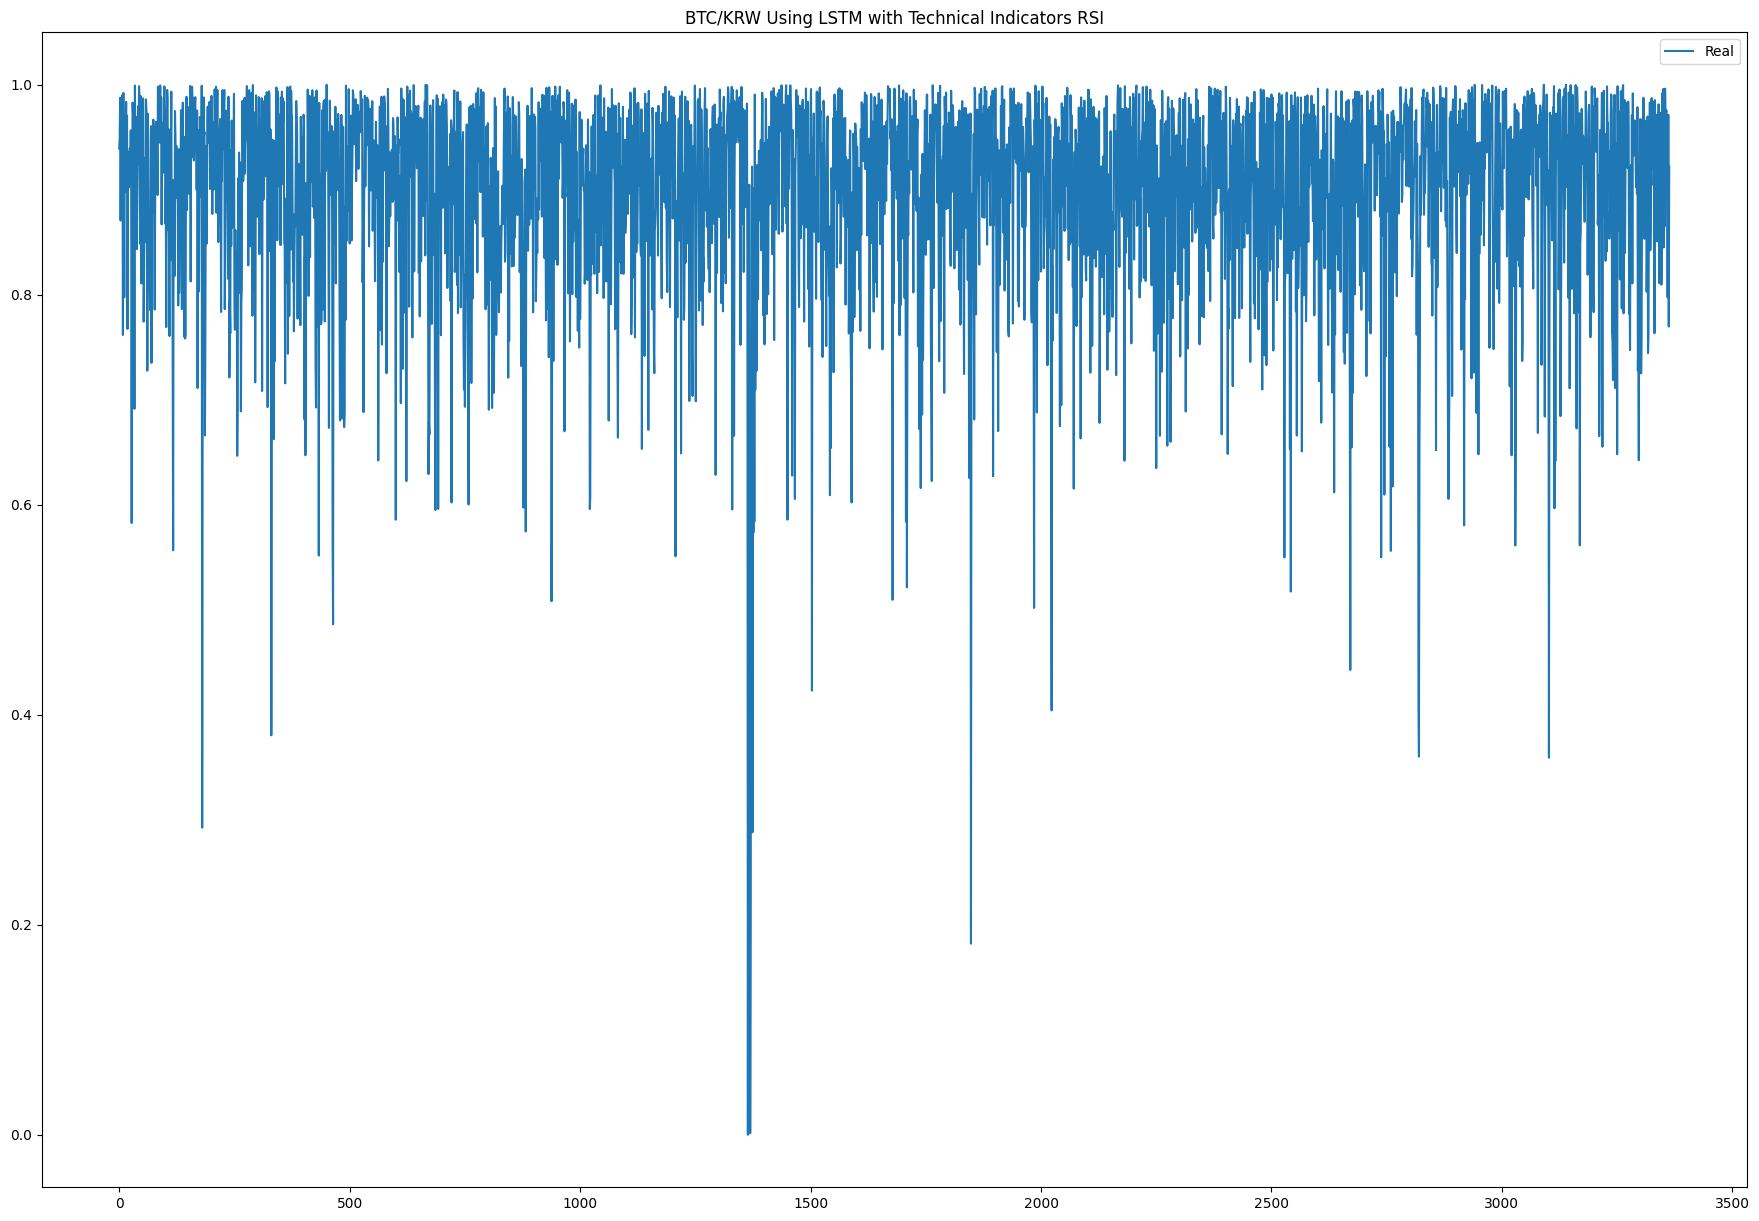

In [ ]:
import matplotlib.pyplot as plt

plt.gcf().set_size_inches(22, 15, forward=True)

start = 0
end = -1

# # test
# real = plt.plot(unscaled_y_test[start:end], label='real')
# pred = plt.plot(y_test_predicted[start:end], label='predicted')

# train
real = plt.plot(unscaled_y[start:end], label='real')
pred = plt.plot(y_predicted[start:end], label='predicted')

plt.legend(['Real', 'Predicted'])
plt.title('BTC/KRW')
plt.show()

# # 기술적 지표 시각화
# tech_ind = technical_indicators_normalized[:, 0]  # 첫번째 기술적 지표 선택 (예: SMA)
# plt.plot(tech_ind[start:end], label='tech_indicator')
# plt.legend(['Real', 'Predicted', 'Technical Indicator'])
# plt.title('BTC/KRW Using LSTM with Technical Indicators RSI')
# plt.show()

In [ ]:
col_name = ['real', 'pred']
real, pred = pd.DataFrame(unscaled_y[start:end]), pd.DataFrame(y_predicted[start:end])
foo = pd.concat([real, pred], axis = 1)
foo.columns = col_name

In [ ]:
foo

,real,pred
0,2.704745e+05,3.351659e+04
1,2.713534e+05,3.552027e+04
2,2.618978e+05,3.785719e+04
3,2.648026e+05,3.626030e+04
4,2.640451e+05,3.460859e+04
...,...,...
3359,8.027416e+07,8.541062e+07
3360,8.074441e+07,8.173907e+07
3361,8.528306e+07,8.075967e+07
3362,8.664105e+07,8.380209e+07


In [ ]:
print('scaled_mse: ',scaled_mse)

scaled_mse:  897987.2437505191


In [ ]:
foo.corr()

,real,pred,real+1
real,1.000000,0.998741,0.998934
pred,0.998741,1.000000,0.999754
real+1,0.998934,0.999754,1.000000


In [ ]:
foo['real+1'] = foo['real'].shift(periods = 1)
foo[['real+1', 'pred']].corr()

,real+1,pred
real+1,1.000000,0.999754
pred,0.999754,1.000000
